In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 128
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 1/5]
I = [0.1, 1/5]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 319 		 0.34 		 0.46 |
| 3168 		 0.08 		 0.19 |
| 2825 		 0.17 		 0.33 |
| 1951 		 0.2 		 0.06 |
| 452 		 0.05 		 0.04 |
| 417 		 0.16 		 0.1 |
| 407 		 0.34 		 0.0 |
| 1481 		 0.51 		 0.06 |
| 1161 		 0.13 		 0.09 |
| 142 		 0.03 		 0.0 |
| 2711 		 0.2 		 0.06 |
| 656 		 0.05 		 0.14 |
| 4132 		 0.08 		 0.42 |
| 4474 		 0.02 		 0.21 |
| 1677 		 0.25 		 0.39 |
| 370 		 0.36 		 0.25 |
| 3452 		 0.09 		 0.41 |
| 4762 		 0.36 		 0.3 |
| 311 		 0.02 		 0.43 |
-------------------------------------
The s.d. of M is: 1221.0
The s.d. of E is: 0.14
The s.d. of I is: 0.15
-------------------------------------
The mean of M is: 1873
The mean of E is: 0.23
The mean of I is: 0.2
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 2000, 0.2, 0.2


#####################################
Ru

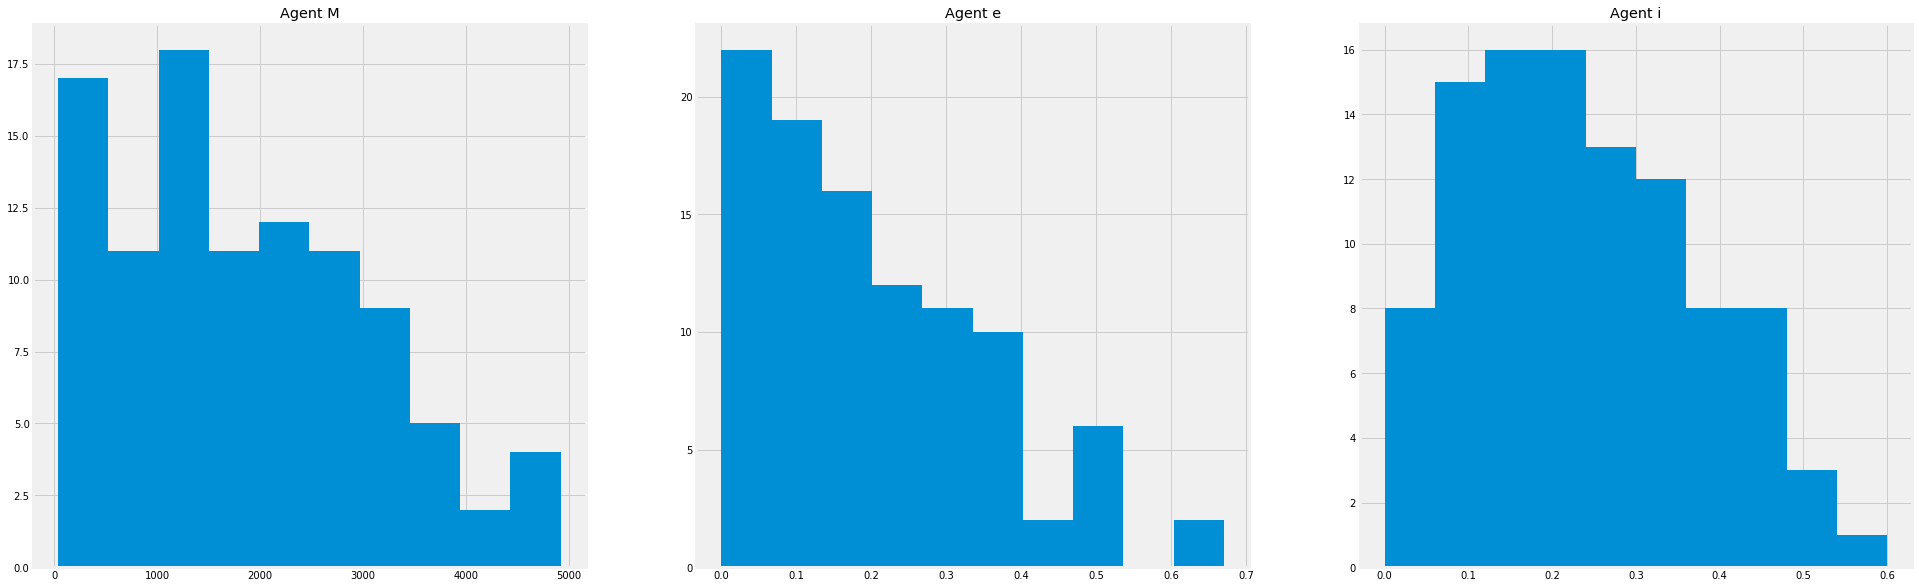

In [3]:
check_parameters(agents, M, E, I)

In [4]:
tournament_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 109 minutes.


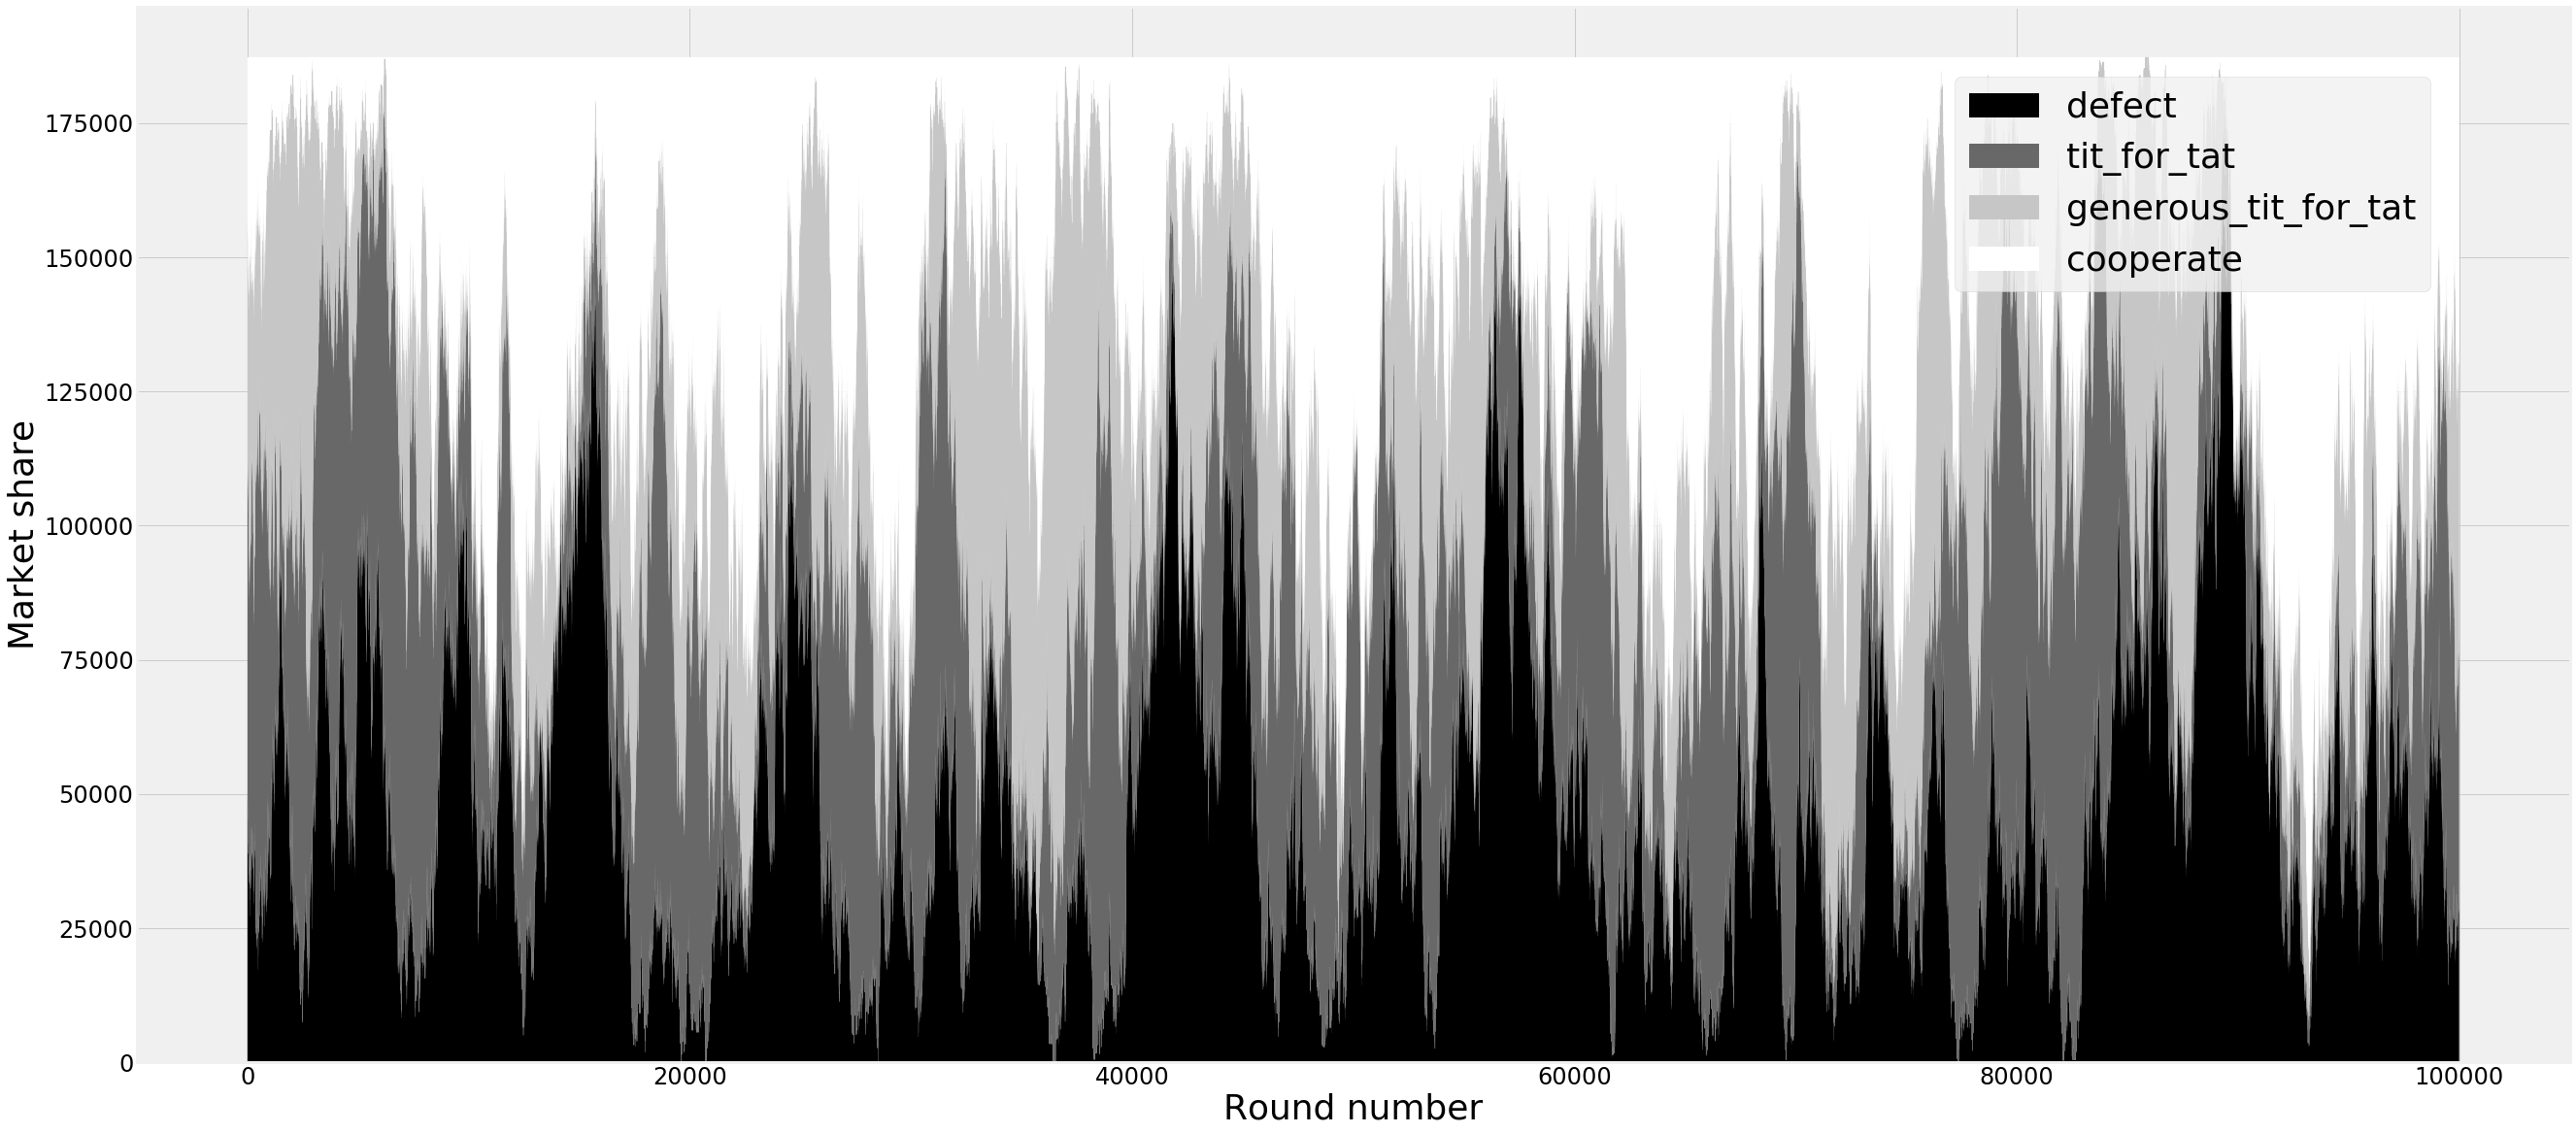

In [5]:
draw_stack(tournament_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02)

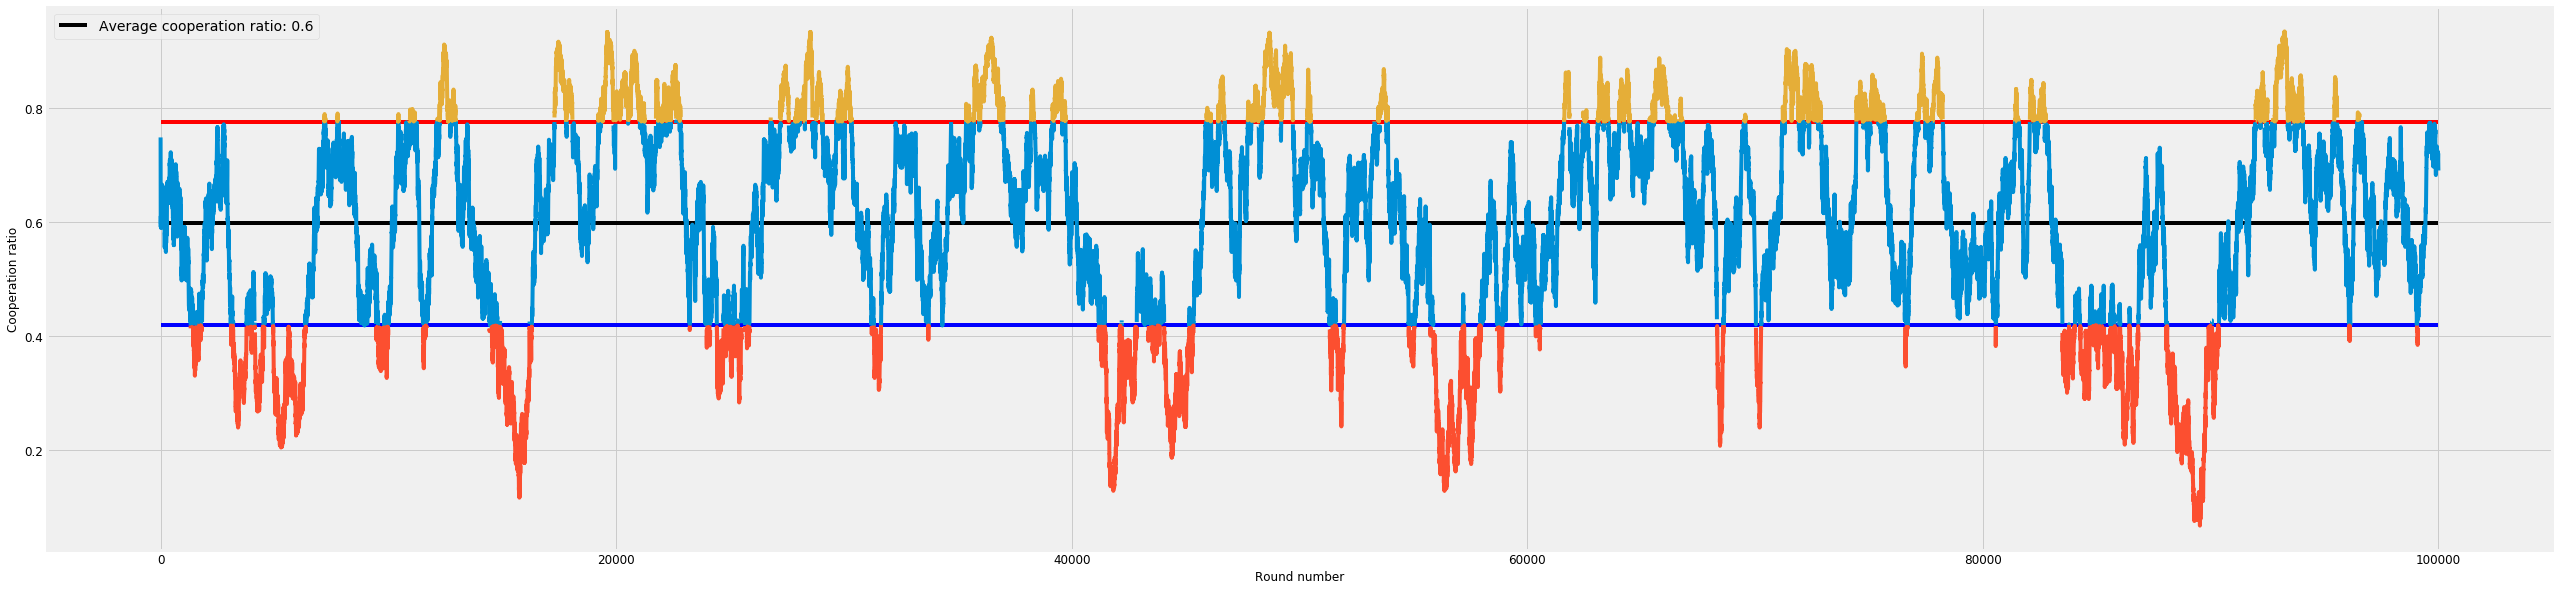

In [6]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02, constant = 1)

In [9]:
outliers = count_outliers(tournament_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv", encoding='utf-8', index = False, float_format='%.1f')

KeyboardInterrupt: 

In [8]:
save_cooperate_csv(tournament_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02, type_of_tournament= "tournament_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02", seed = str(seed))

In [11]:
df.to_csv("Data/data_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv", encoding='utf-8', index = False, float_format='%.1f')